In [1]:
import os

CONFIG_PATH = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [2]:
WEIGHTS_PATH = 'groundingdino_swint_ogc.pth'

In [3]:
from groundingdino.util.inference import Model

/home/shared/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/shared/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-10-05 14:38:08.433779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 14:38:08.537033: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for

In [4]:
model = Model(model_config_path=CONFIG_PATH, model_checkpoint_path=WEIGHTS_PATH)

/home/shared/.local/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [35]:
model.model.

Object `model.get_last_selfattention` not found.


In [5]:
import cv2

In [6]:
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [13]:
def detect_objects(img_path, classes):
    image = cv2.imread(img_path)
    caption = ". ".join(classes)
    
    detections, labels = model.predict_with_caption(
        image=image,
        caption=caption,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    print(detections)
    print(f"Len detections: {len(detections)}")
    
    box_annotator = sv.BoxAnnotator()
    labels = [
        f"{label} {confidence:0.2f}" 
        for label, (_, confidence, class_id, _) 
        in zip(labels, detections)]
    annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)
    
    
    %matplotlib inline
    sv.plot_image(annotated_frame, (16, 16))

In [8]:
import supervision as sv

In [9]:
path = "/NAS/prod_platform_data/twins/38003/sourceImages_medium/Section 3__5DownCamera__D_01_01364_365fe2.JPG"

Detections(xyxy=array([[5030.1772 ,  110.72504, 5267.5747 ,  352.4151 ]], dtype=float32), class_id=None, confidence=array([0.7496609], dtype=float32), tracker_id=None)
Len detections: 1


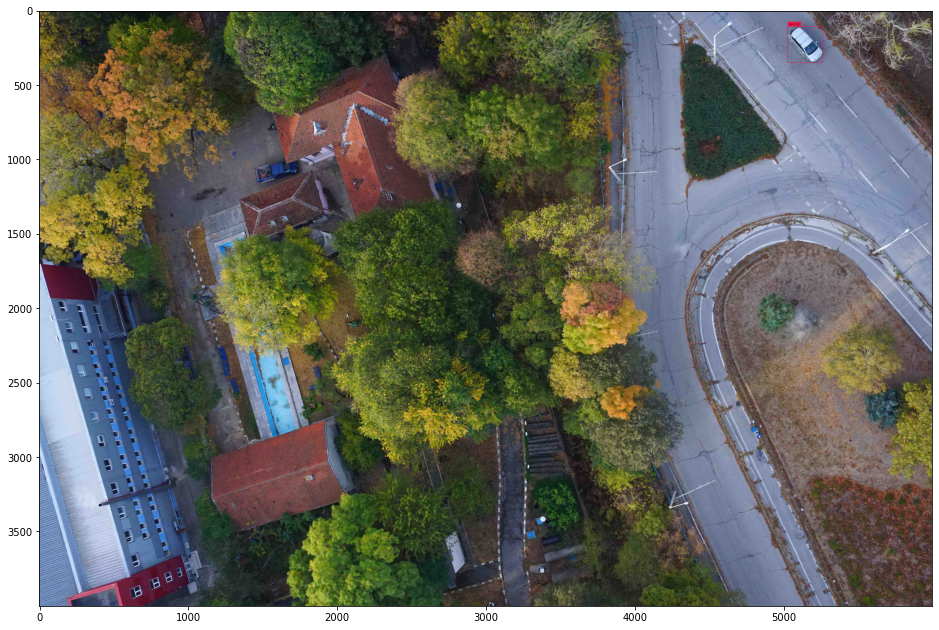

In [14]:
detect_objects(path, ['car'])

Detections(xyxy=array([[150.81793 ,  61.505814, 323.89285 , 306.90717 ]], dtype=float32), class_id=None, confidence=array([0.7243054], dtype=float32), tracker_id=None)
Len detections: 1


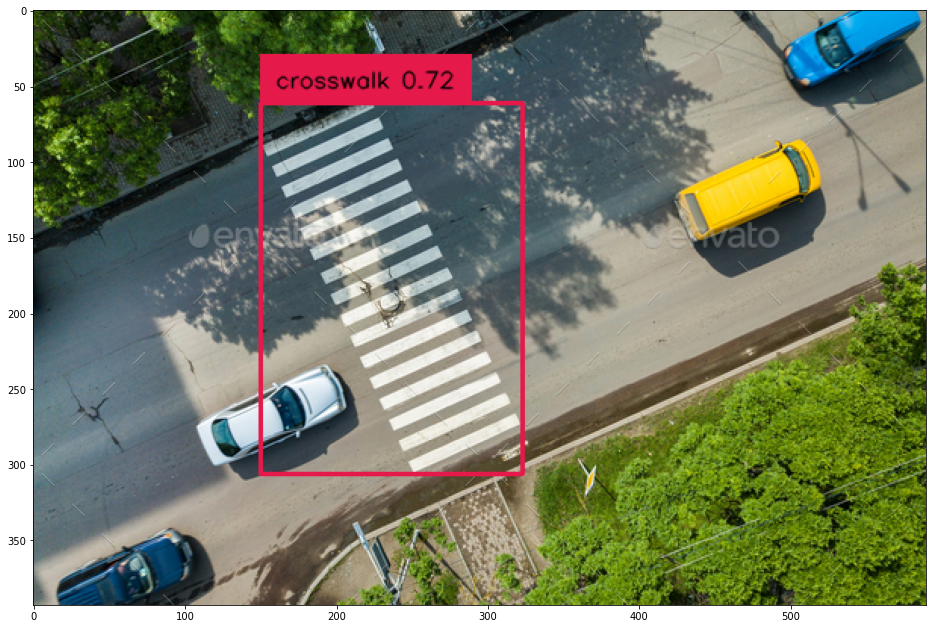

In [15]:
detect_objects('crosswalk.jpg', ['crosswalk'])